<a href="https://colab.research.google.com/github/ImashaKumarasinghe/MERN_Project/blob/main/regression_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imakumarasinghe
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 5.05MB/s]

In [ ]:
data=pd.read_csv("random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
x = data['x']
y = data['y']

In [ ]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


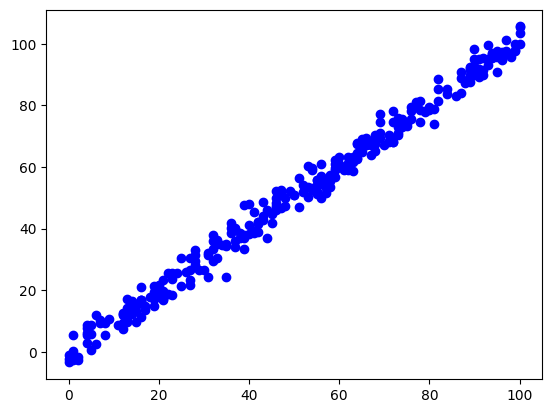

In [ ]:
plt.scatter(x,y, c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((240,), (60,))

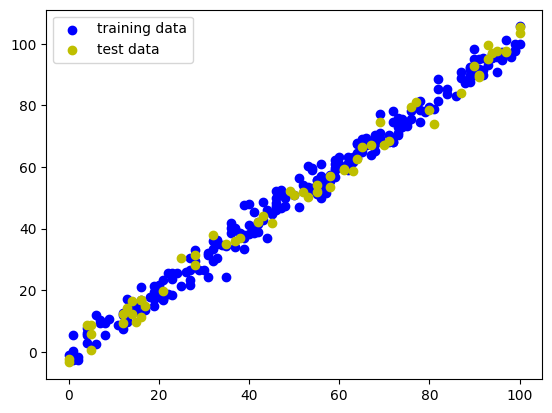

In [ ]:
plt.scatter(x_train, y_train, c='b' ,label='training data')
plt.scatter(x_test, y_test, c='y', label='test data')
plt.legend()
plt.show()

Model bulding

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics = ['mae'])
epoch_number=10
history= model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 33.5963 - mae: 33.5963
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4823 - mae: 11.4823 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8636 - mae: 3.8636 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2478 - mae: 3.2478 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5205 - mae: 2.5205 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7132 - mae: 2.7132 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0519 - mae: 3.0519 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8414 - mae: 3.8414 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9599 - mae: 3.9599 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0233 - mae: 4.0233 


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [ ]:
y_prediction=model.predict(x_test)
y_prediction[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[91.494545 ],
       [77.25868  ],
       [95.561935 ],
       [ 5.0625215],
       [92.51139  ]], dtype=float32)

In [ ]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


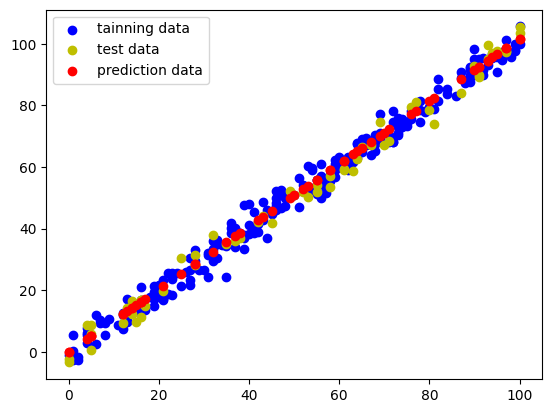

In [ ]:
plt.scatter(x_train, y_train, c='b', label='tainning data')
plt.scatter(x_test, y_test, c='y', label='test data')
plt.scatter(x_test, y_prediction, c='r', label='prediction data')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6051 - mae: 2.6051 


[2.5985093116760254, 2.5985093116760254]

In [ ]:
mae = tf.reduce_mean(tf.abs(tf.constant(y_test, dtype=tf.float32) - tf.squeeze(y_prediction)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5985093116760254>

In [ ]:
mse = tf.reduce_mean(tf.square(tf.constant(y_test, dtype=tf.float32) - tf.squeeze(y_prediction)))
print("Mean Squared Error:", mse.numpy())

Mean Squared Error: 9.797317


In [ ]:
history.history

{'loss': [25.274477005004883,
  8.67979907989502,
  3.762326955795288,
  3.028395652770996,
  2.684094190597534,
  2.7848687171936035,
  3.219789743423462,
  3.9906792640686035,
  3.648615837097168,
  3.86962890625],
 'mae': [25.274477005004883,
  8.67979907989502,
  3.762326955795288,
  3.028395652770996,
  2.684094190597534,
  2.7848687171936035,
  3.219789743423462,
  3.9906792640686035,
  3.648615837097168,
  3.86962890625]}

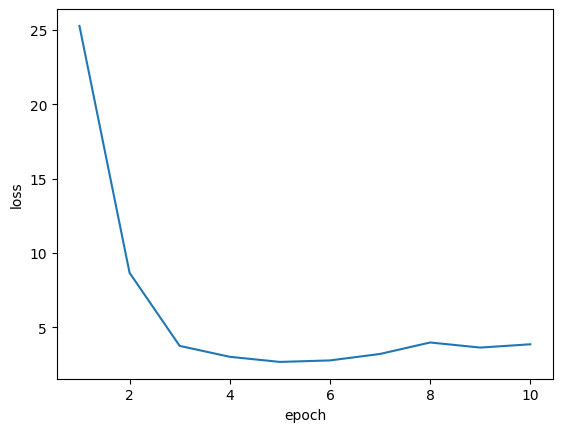

In [ ]:
x_range=range(1,epoch_number+1)
loss=history.history['loss']
plt.plot(x_range, history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()